[View in Colaboratory](https://colab.research.google.com/github/mogamin/chainer-examples/blob/master/chainer_number_plus_regression.ipynb)

In [0]:
!pip install chainer

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import chainer

In [35]:
from chainer.datasets import split_dataset_random

x = np.random.rand(100) * 10
x = x.reshape(int(len(x)/2), 2)
x = np.array(x, dtype=np.int32)

x = np.array(x, dtype=np.float32)
y = x[:,0] + x[:, 1]
y = y.reshape(len(y),1)
y = np.array(y, dtype=np.float32)
print(x.shape)
print(y.shape)

dataset = list(zip(x, y))
train, test = split_dataset_random(dataset, int(len(dataset)*0.7))

print(type(train))       #chainer.datasets.sub_dataset.SubDataset
print(type(train[0]))    #tuple
print(type(train[0][0])) #numpy.ndarray
print(type(train[0][1])) #numpy.ndarray

sample_x = pd.DataFrame(x)
sample_x.describe()
#print(x)

(50, 2)
(50, 1)
<class 'chainer.datasets.sub_dataset.SubDataset'>
<class 'tuple'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


,0,1
count,50.000000,50.00000
mean,4.040000,4.36000
std,3.257393,2.87679
min,0.000000,0.00000
25%,1.000000,2.00000
50%,4.000000,4.00000
75%,7.000000,7.00000
max,9.000000,9.00000


In [0]:
import chainer.links as L
import chainer.functions as F

class NN(chainer.Chain):
    def __init__(self, n_units, n_output):
        super().__init__()
        with self.init_scope():
            self.l1 = L.Linear(None, n_units)
            self.l2 = L.Linear(None, n_output)
    
    def __call__(self, x, t, train = True):
      y = self.predictor(x)
      loss = F.mean_squared_error(y, t)
      if train:
          chainer.report({'loss': loss}, self)
      return loss
    
    def predictor(self, x):
      h = F.relu(self.l1(x))
      return self.l2(h)

In [0]:
model = NN(100, 1)

In [0]:
from chainer import optimizers
from chainer import training

optimizer = optimizers.Adam()
optimizer.setup(model)

batchsize = 1000
train_iter = chainer.iterators.SerialIterator(train, batchsize)
test_iter = chainer.iterators.SerialIterator(test, batchsize, repeat = False, shuffle = False)
updater = training.StandardUpdater(train_iter, optimizer)

In [39]:
from chainer.training import extensions

epoch = 100000
trainer = training.Trainer(updater, (epoch, 'epoch'), out = 'result')
trainer.extend(extensions.Evaluator(test_iter, model))
trainer.extend(extensions.LogReport(trigger=(1000, 'epoch')))
trainer.extend(extensions.PrintReport(['epoch', 'main/loss', 'validation/main/loss', 'elapsed_time']), trigger=(1000, 'epoch'))
trainer.run()

epoch       main/loss   validation/main/loss  elapsed_time
35          12.5672     10.7974               0.0938286     
70          1.73146     1.20761               0.189466      
105         0.459098    0.355394              0.275287      
140         0.179766    0.168507              0.370938      
175         0.0932243   0.109883              0.457144      
210         0.0617006   0.0806409             0.542254      
245         0.0432471   0.0603451             0.635473      
280         0.0312418   0.0461092             0.721468      
315         0.0240707   0.0367849             0.806668      
350         0.0188614   0.0298922             0.899642      
385         0.0148732   0.0246019             0.985257      
420         0.0115453   0.0201681             1.07089       
455         0.00888457  0.0165641             1.16494       
490         0.00682707  0.0135769             1.2496        
525         0.00524554  0.0112412             1.33831       
560         0.00402996  0.

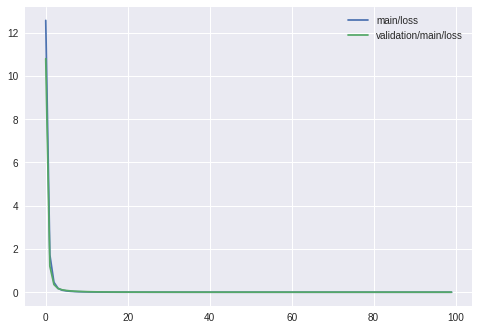

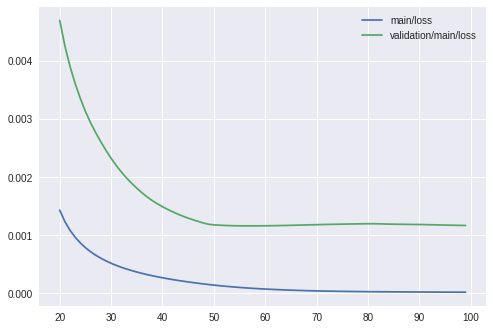

In [59]:
import json

with open('result/log') as f:
  result = pd.DataFrame(json.load(f)).interpolate()


result[['main/loss','validation/main/loss']].plot()

result = result.iloc[20:,:]
result[['main/loss','validation/main/loss']].plot()


In [57]:
x = np.array([13, 188])
x = x.reshape(1, len(x))
x = np.array(x, dtype=np.float32)
y = model.predictor(x)
print('predict={}...({})'.format(np.round_(y.data[0]),y.data[0]))

predict=[201.]...([200.99675])
